In [228]:
import os
import glob
import time
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from externel import seaborn as sns

train_dict = {}
train_dict["time_stamp"] = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
train_dict["project_name"] = "pixel_correlation"
train_dict["save_folder"] = "./project_dir/"+train_dict["project_name"]+"/"

train_dict["folder_X"] = "../SUREMI_data_dir/norm_MR/regular/"
train_dict["folder_Y"] = "../SUREMI_data_dir/norm_CT/regular/"

X_list = sorted(glob.glob(train_dict["folder_X"]+"*.nii.gz"))
Y_list = sorted(glob.glob(train_dict["folder_Y"]+"*.nii.gz"))

In [230]:
nib.load(X_list[0]).get_fdata().shape

(256, 256, 182)

In [ ]:
dist = generate_dist_weights(np.zeros((256, 256, 182)))

In [ ]:
nX_clusters = 5
nY_clusters = 5

def dist_kmeans(X_path, nX_clusters, dist):
    X_file = nib.load(X_path)
    X_data = bin_CT(X_file.get_fdata(), n_bin=n_bin)
    
    X_cluster = cluster.KMeans(n_clusters=nX_clusters)
    X_flatten = np.ravel(X_data)
    X_flatten = np.reshape(X_flatten, (len(X_flatten), 1))
    X_flatten_k = X_cluster.fit_predict(X_flatten)
    X_data_k = np.reshape(X_flatten_k, X_data.shape)
    
    weight_data = np.multiply(X_data_k, dist)
    scores = np.zeros((nX_clusters))
    for idx in range(nX_clusters):
        cluster_map = np.where(X_data==idx, 1, 0)
        scores[idx] = np.sum(np.multiply(cluster_map, dist)) / np.sum(cluster_map)
    print(scores)
    idx_scores = np.argsort(scores)
    
    for idx in range(nX_clusters):
        X_data_k[X_data_k == idx] = nX_clusters+idx
    
    for idx in range(nX_clusters):
        X_data_k[X_data_k == nX_clusters+idx] = idx_scores[idx]
    
    return X_data_k

In [ ]:
for cnt_file, file_path in enumerate(X_list):
    X_data_k = dist_kmeans(file_path, 10, dist)
    X_save_name = X_path.replace("regular", "kmeans")
    X_save_file = nib.Nifti1Image(X_data_k, X_file.affine, X_file.header)
    nib.save(X_save_file, X_save_name)

In [2]:
def bin_CT(img, n_bin=128):
    data_vector = img
    data_max = np.amax(data_vector)
    data_min = np.amin(data_vector)
    data_squeezed = (data_vector-data_min)/(data_max-data_min)
    data_extended = data_squeezed * (n_bin-1)
    data_discrete = data_extended // 1
    return np.asarray(list(data_discrete), dtype=np.int64)

In [3]:
n_clusters = 30
n_bin = 64
iz = 89

X_path = "./data_dir/norm_MR/NORM_097.nii.gz"
X_file = nib.load(X_path)
X_data = bin_CT(X_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)

Y_path = "./data_dir/norm_CT/NORM_097.nii.gz"
Y_file = nib.load(Y_path)
Y_data = bin_CT(Y_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)

FileNotFoundError: No such file or no access: './data_dir/norm_MR/NORM_097.nii.gz'

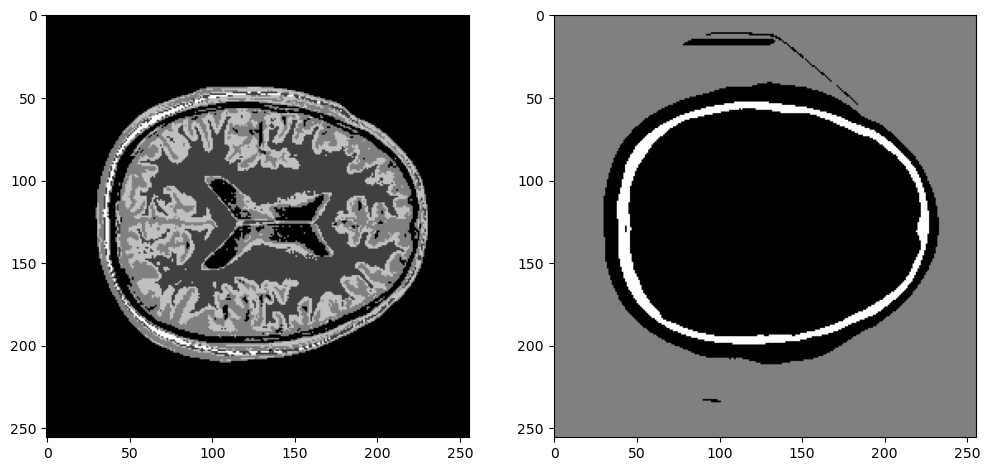

In [105]:
from sklearn import cluster
import matplotlib.pyplot as plt

X_cluster = cluster.KMeans(n_clusters=5)
X_flatten = np.reshape(X_data, (256*256, 3))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, (256, 256))

Y_cluster = cluster.KMeans(n_clusters=3)
Y_flatten = np.reshape(Y_data, (256*256, 3))
Y_flatten_k = Y_cluster.fit_predict(Y_flatten)
Y_data_k = np.reshape(Y_flatten_k, (256, 256))

plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [168]:
X_cluster = cluster.KMeans(n_clusters=5)
X_flatten = np.reshape(X_data, (512*512, 3))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, (512, 512))
unique, counts = np.unique(X_flatten_k, return_counts=True)
max_elem_count = np.amax(counts)
max_elem_label = np.where(counts==np.amax(counts))[0][0]
print(dict(zip(unique, counts)))
print(max_elem_count, max_elem_label)

{0: 181874, 1: 23491, 2: 23654, 3: 3851, 4: 29274}
181874 0


In [129]:
max_elem_count = np.amax(counts)
max_elem_label = np.where(counts==np.amax(counts))[0][0]
print(max_elem_count, max_elem_label)

41821 1


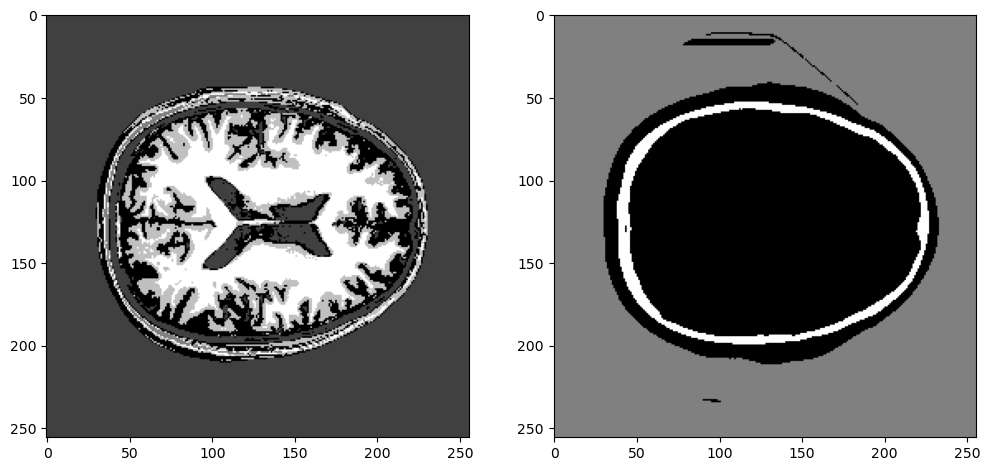

In [130]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [131]:
X_flatten_k[X_flatten_k == max_elem_label] = 10
X_flatten_k[X_flatten_k == 0] = max_elem_label
X_flatten_k[X_flatten_k == 10] = 0

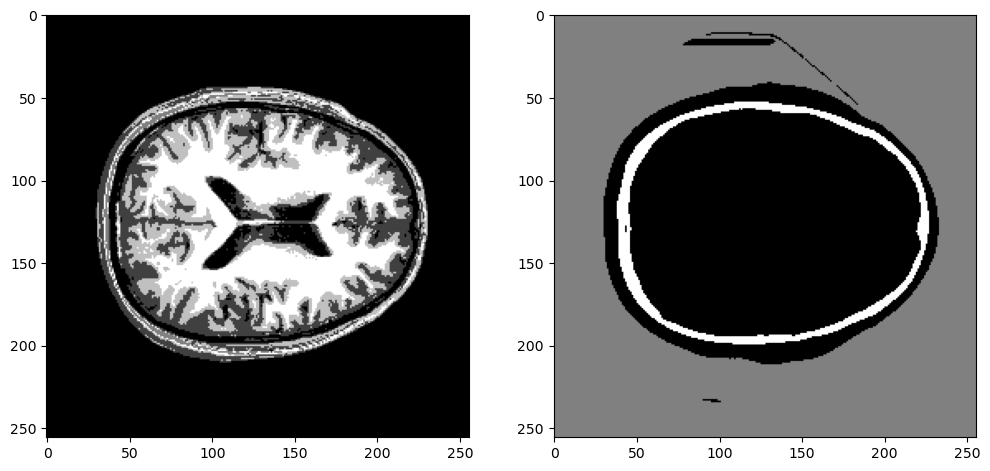

In [132]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [138]:
print(np.where(X_flatten_k == int(idx))[0].shape)

(41821,)


In [157]:
n_clusters = 30
n_bin = 64
iz = 89

X_path = "./data_dir/unknown/T1B_006.nii.gz"
X_file = nib.load(X_path)
X_data = bin_CT(X_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)

Y_path = "./data_dir/unknown/T2F_004_res.nii.gz"
Y_file = nib.load(Y_path)
Y_data = bin_CT(Y_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)

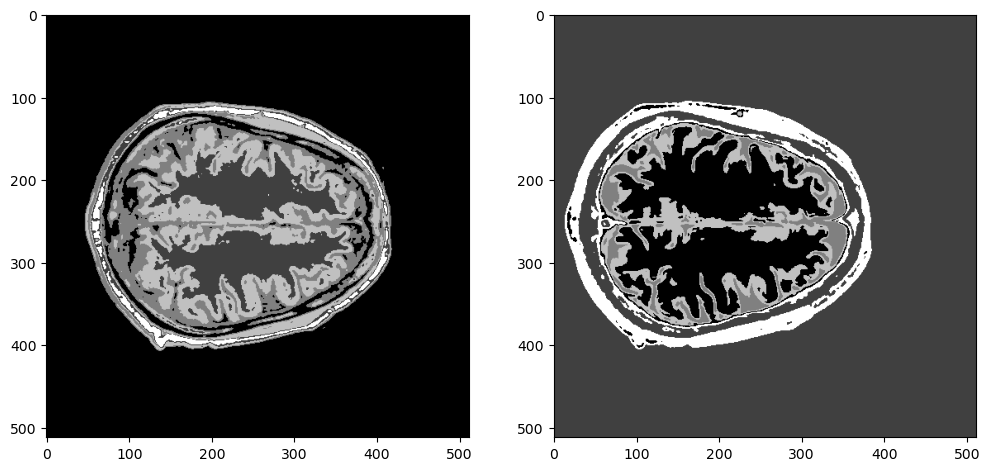

In [159]:
res = X_data.shape[0]
nX_clusters = 5
nY_clusters = 5

X_cluster = cluster.KMeans(n_clusters=nX_clusters)
X_flatten = np.reshape(X_data, (res*res, 3))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, (res, res))

Y_cluster = cluster.KMeans(n_clusters=nY_clusters)
Y_flatten = np.reshape(Y_data, (res*res, 3))
Y_flatten_k = Y_cluster.fit_predict(Y_flatten)
Y_data_k = np.reshape(Y_flatten_k, (res, res))

plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [161]:
X_flatten_k[X_flatten_k == max_elem_label] = 10
X_flatten_k[X_flatten_k == 0] = max_elem_label
X_flatten_k[X_flatten_k == 10] = 0

Y_flatten_k[Y_flatten_k == max_elem_label] = 10
Y_flatten_k[Y_flatten_k == 0] = max_elem_label
Y_flatten_k[Y_flatten_k == 10] = 0

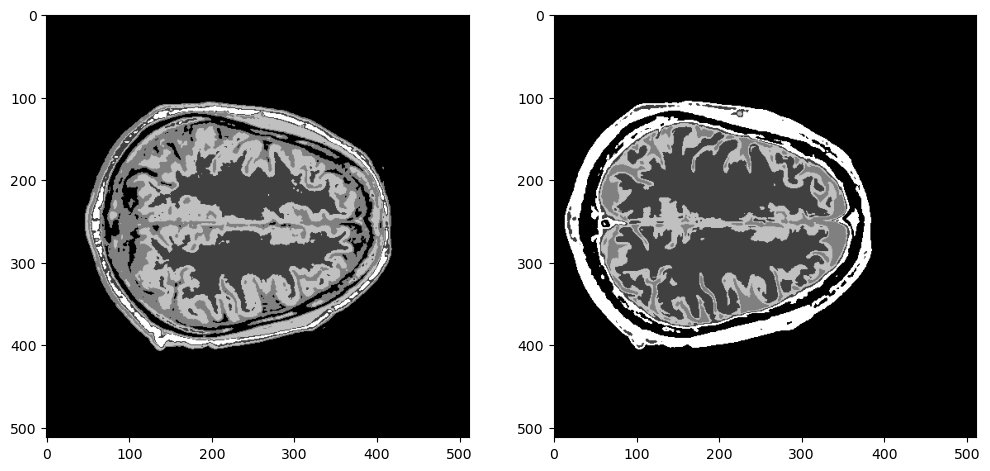

In [162]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [165]:
X_iso = np.zeros((5, 512, 512))
for idx in range(5):
    X_iso_slice = np.zeros((512, 512))
    X_mask = np.asarray([X_flatten_k == int(idx)]).reshape((512, 512))
    X_iso_slice[X_mask] = 1
    X_iso[idx, :, :] = X_iso_slice

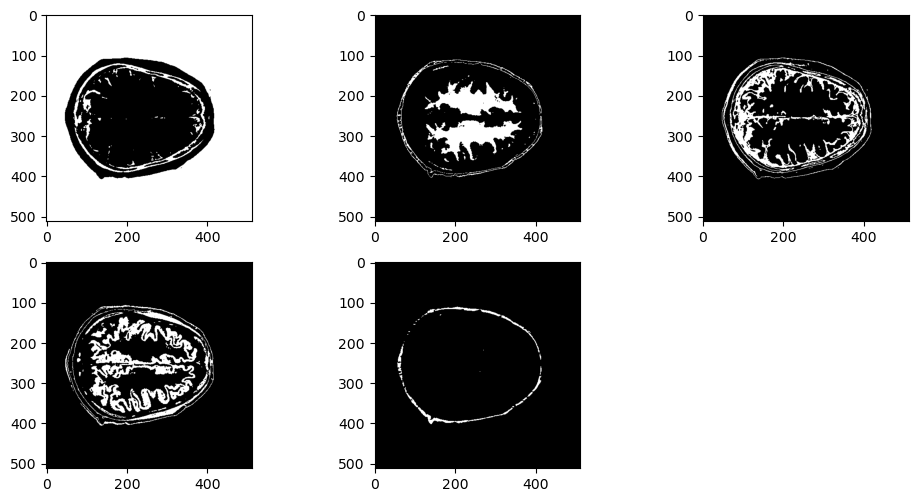

In [166]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(2,3,1)
plt.imshow(X_iso[0, :, :], cmap="gray")
plt.subplot(2,3,2)
plt.imshow(X_iso[1, :, :], cmap="gray")
plt.subplot(2,3,3)
plt.imshow(X_iso[2, :, :], cmap="gray")
plt.subplot(2,3,4)
plt.imshow(X_iso[3, :, :], cmap="gray")
plt.subplot(2,3,5)
plt.imshow(X_iso[4, :, :], cmap="gray")

In [151]:
X_iso = np.zeros((5, 256, 256))
for idx in range(5):
    X_iso_slice = np.zeros((256, 256))
    X_mask = np.asarray([Y_flatten_k == int(idx)]).reshape((256, 256))
    X_iso_slice[X_mask] = 1
    X_iso[idx, :, :] = X_iso_slice

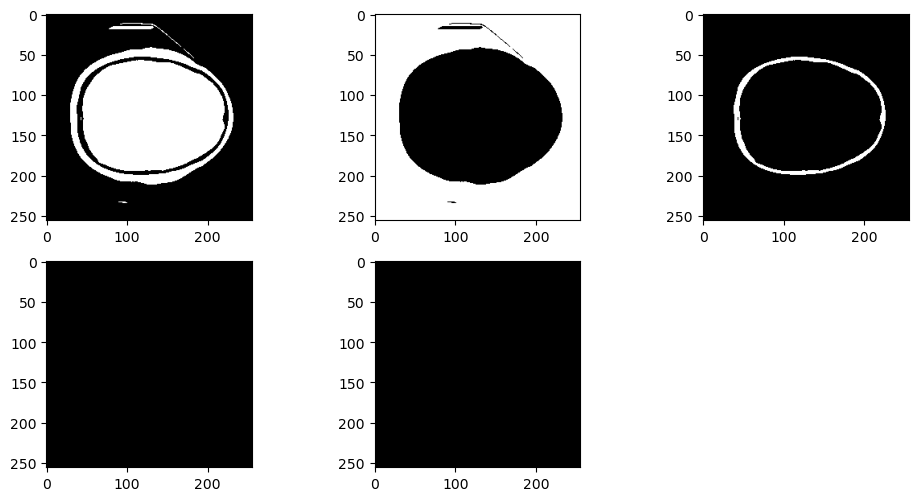

In [152]:
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(2,3,1)
plt.imshow(X_iso[0, :, :], cmap="gray")
plt.subplot(2,3,2)
plt.imshow(X_iso[1, :, :], cmap="gray")
plt.subplot(2,3,3)
plt.imshow(X_iso[2, :, :], cmap="gray")
plt.subplot(2,3,4)
plt.imshow(X_iso[3, :, :], cmap="gray")
plt.subplot(2,3,5)
plt.imshow(X_iso[4, :, :], cmap="gray")

In [57]:
n_clusters = 30
n_bin = 64
izx = 70
izy = 70

X_path = "./data_dir/unknown/T1B_006.nii.gz"
X_file = nib.load(X_path)
X_data = bin_CT(X_file.get_fdata()[:, :, izx-1:izx+2], n_bin=n_bin)

Y_path = "./data_dir/unknown/T2F_004_res.nii.gz"
Y_file = nib.load(Y_path)
Y_data = bin_CT(Y_file.get_fdata()[:, :, izy-1:izy+2], n_bin=n_bin)

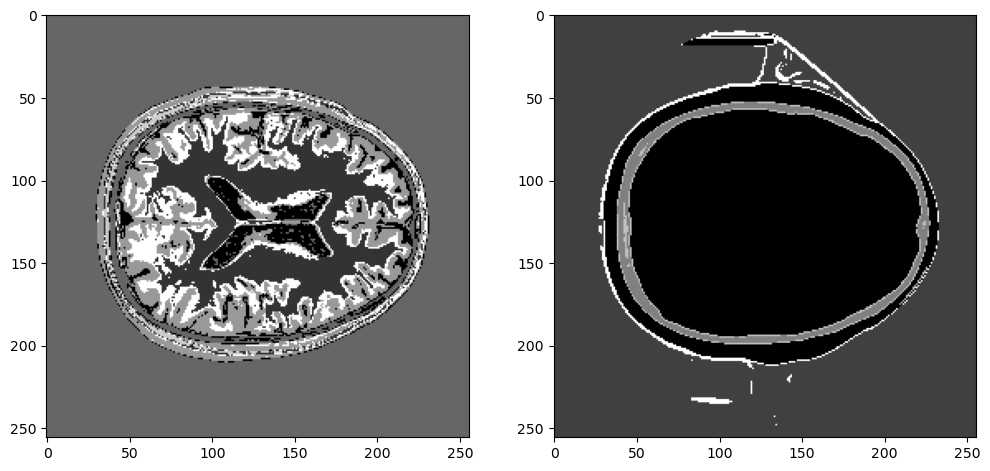

In [153]:
from sklearn import cluster
import matplotlib.pyplot as plt

res = X_data.shape[0]
nX_clusters = 6
nY_clusters = 5

X_cluster = cluster.KMeans(n_clusters=nX_clusters)
X_flatten = np.reshape(X_data, (res*res, 3))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, (res, res))

Y_cluster = cluster.KMeans(n_clusters=nY_clusters)
Y_flatten = np.reshape(Y_data, (res*res, 3))
Y_flatten_k = Y_cluster.fit_predict(Y_flatten)
Y_data_k = np.reshape(Y_flatten_k, (res, res))

plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [78]:
print(np.unique(X_data_k), np.unique(Y_data_k))

[0 1 2 3 4] [0 1 2 3 4]


In [ ]:
[0, 1, 2, 3, 4]
[5, 0, 2, 3, 4]

In [84]:
X_data_k[X_data_k == 0] = 5
X_data_k[X_data_k == 1] = 0

In [90]:
X_data_k[X_data_k == 5] = 1

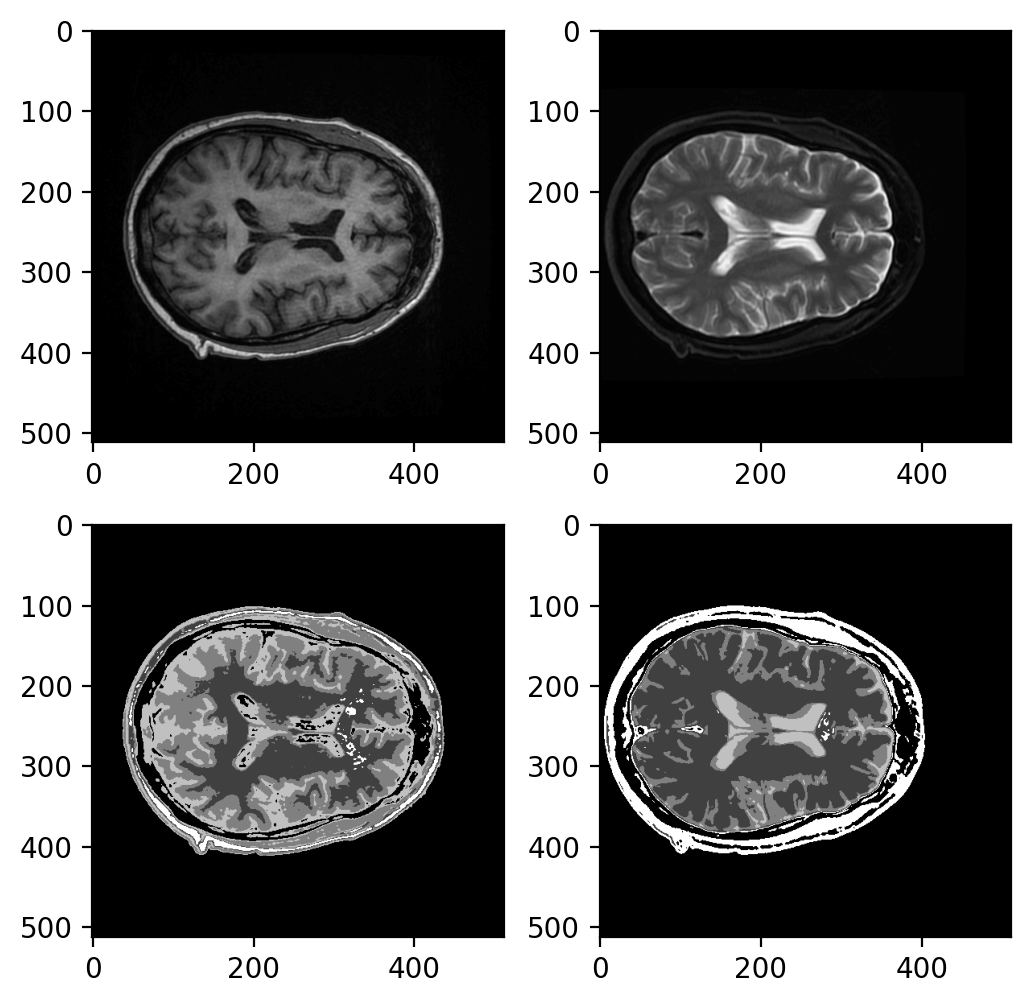

In [95]:
plt.figure(figsize=(6,6), dpi=200)
plt.subplot(2,2,1)
plt.imshow(X_data[:, :, 1]/64, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(Y_data[:, :, 1]/64, cmap="gray")

plt.subplot(2,2,3)
plt.imshow(X_data_k, cmap="gray")
# plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(Y_data_k, cmap="gray")
# plt.colorbar()

In [109]:
def max_min(data, top=255):
    value_max = np.amax(data)
    value_min = np.amin(data)
    return np.array((data - value_min) / (value_max - value_min)*top).astype(int)

In [110]:
n_clusters = 30
n_bin = 255
iz = 89

X_path = "../SUREMI_data_dir/norm_MR/NORM_097.nii.gz"
X_file = nib.load(X_path)
# X_data = bin_CT(X_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)
X_data = max_min(X_file.get_fdata()[:, :, iz-1:iz+2])

Y_path = "../SUREMI_data_dir/norm_CT/NORM_097.nii.gz"
Y_file = nib.load(Y_path)
# Y_data = bin_CT(Y_file.get_fdata()[:, :, iz-1:iz+2], n_bin=n_bin)
Y_data = max_min(Y_file.get_fdata()[:, :, iz-1:iz+2])

In [111]:
print(np.amax(X_data))

255


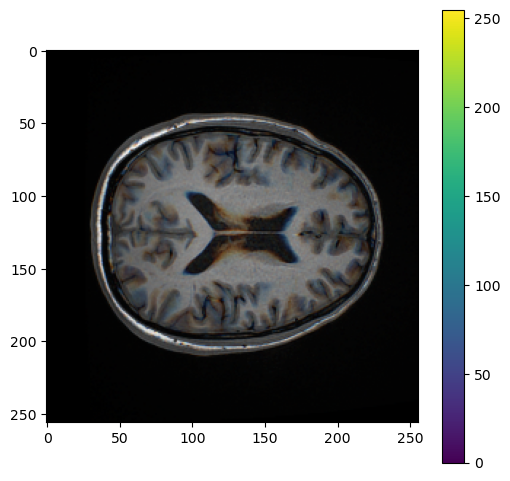

In [112]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(X_data)
plt.colorbar()

In [155]:
print(np.random.randint(256))

204


In [177]:
import scipy, scipy.ndimage

def pv_watershed(data, connectivity=1, epsilon=1):
    labels = np.zeros(data.shape)
    isFinished = False
    cnt_label = 1
    n_dim = 3
    
    while not isFinished:
        loc_unlabeled = np.where(labels == 0)
        n_unlabeled = len(loc_unlabeled[0])
        idx_seed = np.random.randint(n_unlabeled)
        loc_seed = []
        for idx in range(n_dim):
            loc_seed.append(loc_unlabeled[idx][idx_seed])
        print(loc_seed)
        isFinished = True
    
        for idx in range(connectivity):
            len_search = idx + 1
            
    
    return None

In [178]:
pv_watershed(X_data)

[112, 189, 0]
[2 1 0]


In [148]:
from skimage.segmentation import watershed
from skimage.future import graph
import numpy as np

img = X_data

ws_x = watershed(img, 
                 markers=None, 
                 connectivity=2, 
                 offset=None, 
                 mask=None, 
                 compactness=0, 
                 watershed_line=False)
# out1 = color.label2rgb(labels1, X_data, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, ws_x, mode='similarity')
labels2 = graph.cut_normalized(ws_x, g)
# out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

255


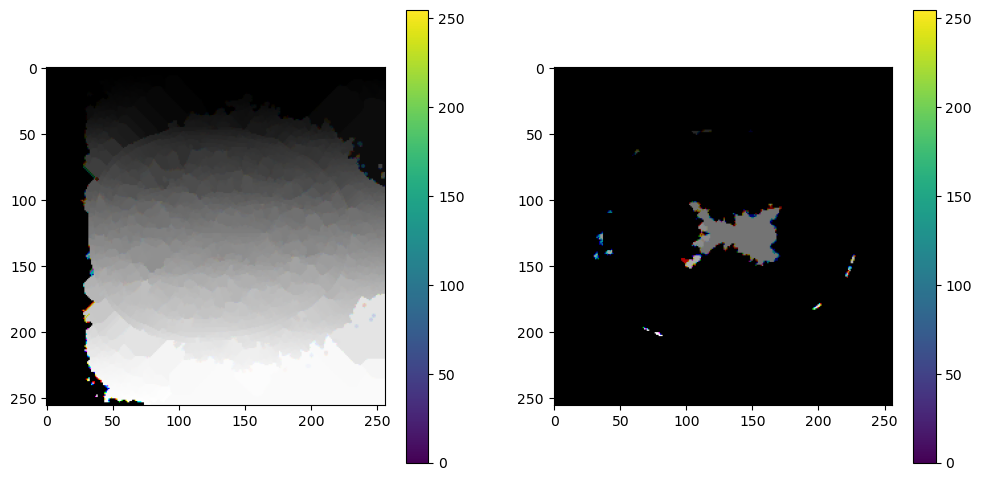

In [150]:
print(np.amax(max_min(ws_x)))
plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(max_min(ws_x))
plt.colorbar()


plt.subplot(1,2,2)
plt.imshow(max_min(labels2))
plt.colorbar()

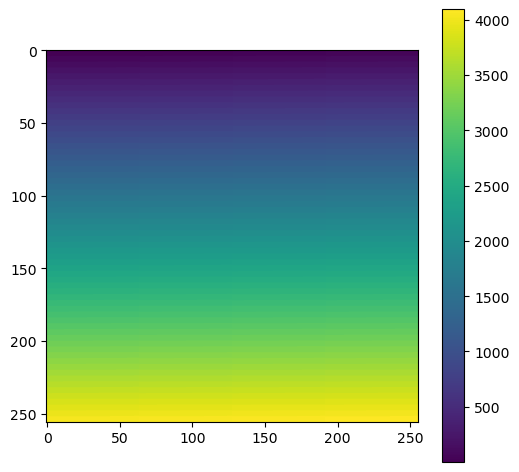

In [73]:
labels1 = segmentation.slic(X_data, compactness=10, n_segments=5000, start_label=1, max_iter=100)
out1 = color.label2rgb(labels1, X_data, kind='avg', bg_label=0)
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(labels1)
plt.colorbar()

In [74]:
print(X_data.shape, data.coffee().shape)

(256, 256, 3) (400, 600, 3)


(array([1.24496e+05, 8.94000e+03, 2.22960e+04, 1.46170e+04, 1.81060e+04,
        6.68000e+03, 5.75000e+02, 4.73000e+02, 3.31000e+02, 9.40000e+01]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <a list of 10 Patch objects>)

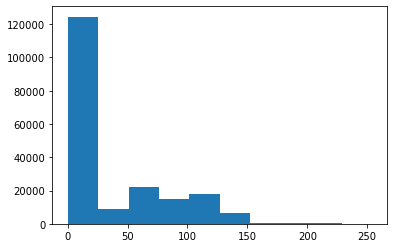

In [52]:
plt.hist(np.ravel(X_data))

(array([156132., 108475.,  75872.,  60068.,  54885.,  52525.,  67624.,
         73504.,  40230.,  30685.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

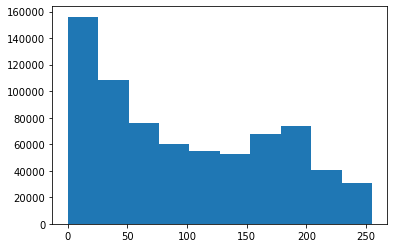

In [53]:
plt.hist(np.ravel(data.coffee()))

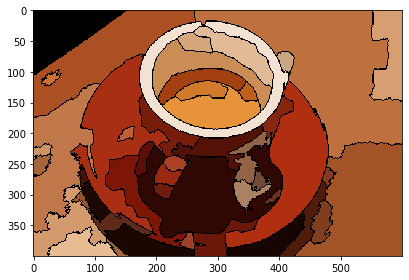

In [34]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])


img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

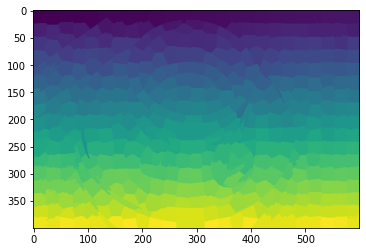

In [37]:
plt.imshow(labels)

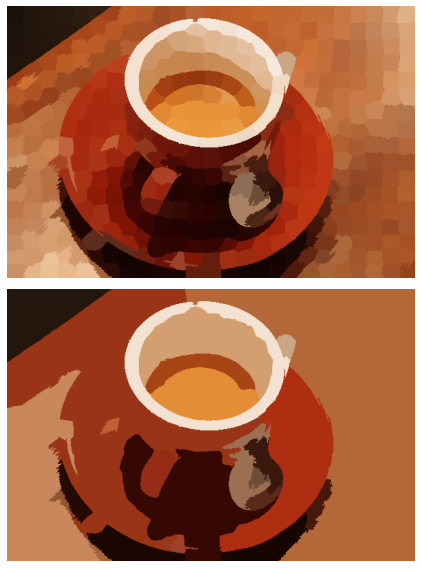

In [36]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [188]:
n_clusters = 30
n_bin = 64
izx = 70
izy = 70

X_path = "../SUREMI_data_dir/unknown/T1B_006.nii.gz"
X_file = nib.load(X_path)
X_data = bin_CT(X_file.get_fdata(), n_bin=n_bin)

Y_path = "../SUREMI_data_dir/unknown/T2F_004_res.nii.gz"
Y_file = nib.load(Y_path)
Y_data = bin_CT(Y_file.get_fdata(), n_bin=n_bin)

In [194]:
def generate_dist_weights(data):
    dist = np.zeros((data.shape))
    len_x = data.shape[0]
    len_y = data.shape[1]
    len_z = data.shape[2]
    center = [len_x // 2, len_y // 2, len_z // 2]
    for ix in range(len_x):
        for iy in range(len_y):
            for iz in range(len_z):
                dx = np.abs(ix-center[0]) ** 2
                dy = np.abs(iy-center[1]) ** 2
                dz = np.abs(iz-center[2]) ** 2
                dist[ix, iy, iz] = np.sqrt(dx+dy+dz)
    
    return dist

In [219]:
from sklearn import cluster
import matplotlib.pyplot as plt

res = X_data.shape[0]
nX_clusters = 5
nY_clusters = 5

def dist_kmeans(X_path, nX_clusters, dist):
    X_file = nib.load(X_path)
    X_data = bin_CT(X_file.get_fdata(), n_bin=n_bin)
    
    X_cluster = cluster.KMeans(n_clusters=nX_clusters)
    X_flatten = np.ravel(X_data)
    X_flatten = np.reshape(X_flatten, (len(X_flatten), 1))
    X_flatten_k = X_cluster.fit_predict(X_flatten)
    X_data_k = np.reshape(X_flatten_k, X_data.shape)
    
    weight_data = np.multiply(X_data_k, dist)
    scores = np.zeros((nX_clusters))
    for idx in range(nX_clusters):
        cluster_map = np.where(X_data==idx, 1, 0)
        scores[idx] = np.sum(np.multiply(cluster_map, dist)) / np.sum(cluster_map)
    print(scores)
    idx_scores = np.argsort(scores)
    
    for idx in range(nX_clusters):
        X_data_k[X_data_k == idx] = nX_clusters+idx
    
    for idx in range(nX_clusters):
        X_data_k[X_data_k == nX_clusters+idx] = idx_scores[idx]
    
    X_save_name = X_path.replace(".nii.gz", "_k5.nii.gz")
    X_save_file = nib.Nifti1Image(X_data_k, X_file.affine, X_file.header)
    nib.save(X_save_file, X_save_name)

In [223]:
dist_kmeans(Y_path, 10, dist)

[111.44041626 260.35105784 197.78167109 157.75004973 147.06177652
 146.9339752  146.26040284 146.17737718 146.30350871 148.12302164]


In [189]:
from sklearn import cluster
import matplotlib.pyplot as plt

res = X_data.shape[0]
nX_clusters = 5
nY_clusters = 5

print(X_data.shape)
X_cluster = cluster.KMeans(n_clusters=nX_clusters)
X_flatten = np.ravel(X_data)
X_flatten = np.reshape(X_flatten, (len(X_flatten), 1))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, X_data.shape)
print(X_data_k.shape)

X_save_name = X_path.replace(".nii.gz", "_k5.nii.gz")
X_save_file = nib.Nifti1Image(X_data_k, X_file.affine, X_file.header)
nib.save(X_save_file, X_save_name)

(512, 512, 140)
(512, 512, 140)


In [195]:
dist = generate_dist_weights(X_data)
X_save_name = X_path.replace(".nii.gz", "_dist.nii.gz")
X_save_file = nib.Nifti1Image(dist, X_file.affine, X_file.header)
nib.save(X_save_file, X_save_name)

In [203]:
weight_data = np.multiply(X_data_k, dist)
scores = np.zeros((nX_clusters))
for idx in range(nX_clusters):
    cluster_map = np.where(X_data==idx, 1, 0)
    scores[idx] = np.sum(np.multiply(cluster_map, dist)) / np.sum(cluster_map)
print(scores)
idx_scores = np.argsort(scores)

[262.02466592 204.26240114 166.41767195 142.84294644 130.75655916]


In [202]:
print(np.argsort(scores))

[4 3 2 1 0]


In [211]:
for idx in range(nX_clusters):
    X_data_k[X_data_k == idx] = nX_clusters+idx

In [213]:
for idx in range(nX_clusters):
    X_data_k[X_data_k == nX_clusters+idx] = idx_scores[idx]       

In [214]:
X_save_name = X_path.replace(".nii.gz", "_k5.nii.gz")
X_save_file = nib.Nifti1Image(X_data_k, X_file.affine, X_file.header)
nib.save(X_save_file, X_save_name)

In [ ]:
from sklearn import cluster
import matplotlib.pyplot as plt

res = X_data.shape[0]
nX_clusters = 5
nY_clusters = 5

X_cluster = cluster.KMeans(n_clusters=nX_clusters)
X_flatten = np.ravel(X_data)
X_flatten = np.reshape(X_flatten, (len(X_flatten), 1))
X_flatten_k = X_cluster.fit_predict(X_flatten)
X_data_k = np.reshape(X_flatten_k, (res, res))

Y_cluster = cluster.KMeans(n_clusters=nY_clusters)
Y_flatten = np.reshape(Y_data, (res*res, 3))
Y_flatten_k = Y_cluster.fit_predict(Y_flatten)
Y_data_k = np.reshape(Y_flatten_k, (res, res))

plt.figure(figsize=(12,6), dpi=100)
plt.subplot(1,2,1)
plt.imshow(X_data_k, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(Y_data_k, cmap="gray")

In [13]:
X_data_kmeans = 
X_save_name = "./data_dir/norm_MR/"+os.path.basename(file_path)[:-7]+"_kmeans.nii.gz"
X_save_file = nib.Nifti1Image(X_data_kmeans, X_file.affine, X_file.header)
nib.save(X_save_file, X_save_name)

SyntaxError: invalid syntax (82454510.py, line 1)

In [234]:
my_list = list(range(10))
print(my_list)
print(str(my_list).replace(", ", "_"))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0_1_2_3_4_5_6_7_8_9]
